In [552]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor

import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

# DT ver 1 - Gini, best splitter 

In [429]:
#create features' names
numbers = np.arange(1, 241)
features = list(str(' ') * 240)

for i in range (len(numbers)):
    features[i] = "f" + str(numbers[i])

#load the data in - should be 2000*240
digitPics = pd.read_csv("mfeat-pix.txt", sep = "\s+", header = None, names = features)

# create target vector by repeating digits 200 times
digitLabels = np.repeat(np.array([0,1,2,3,4,5,6,7,8,9]), 200, axis=0)

#add target vector to the data frame 
digitPics['label'] = digitLabels

digitPics

f1  f2  f3  f4  f5  f6  f7  f8  f9  f10  ...  f232  f233  f234  f235  \
0      0   3   4   4   6   6   6   6   6    5  ...     4     4     4     4   
1      0   0   0   0   0   0   1   3   4    4  ...     4     4     4     4   
2      0   0   1   4   4   4   4   4   4    3  ...     3     4     4     4   
3      0   0   3   3   2   2   4   5   6    6  ...     4     4     4     2   
4      0   0   0   0   0   0   3   4   6    6  ...     4     4     4     3   
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...   ...   ...   ...   ...   
1995   0   0   0   1   3   4   5   6   4    4  ...     4     4     4     4   
1996   0   0   0   0   3   6   6   6   6    6  ...     4     4     3     0   
1997   0   0   0   2   4   4   4   6   4    4  ...     2     4     4     4   
1998   0   0   0   0   0   0   2   4   4    5  ...     4     4     4     4   
1999   0   0   1   5   6   6   6   6   6    6  ...     4     1     0     0   

      f236  f237  f238  f239  f240  label  
0        3     0     0     0     0      0  
1        2     0     0     0     0      0  
2        4     4     2     1     0      0  
3        0     0     0     0     0      0  
4        1     0     0     0     0      0  
...    ...   ...   ...   ...   ...    ...  
1995     4     4     0     0     0      9  
1996     0     0     0     0     0      9  
1997     1     0     0     0     0      9  
1998     2     0     0     0     0      9  
1999     0     0     0     0     0      9  

[2000 rows x 241 columns]

In [430]:
#split the data into train and test
X = digitPics[features] # Features
y = digitPics.label # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [431]:
# Create Decision Tree classifer object
DT = DecisionTreeClassifier()
# Train Decision Tree Classifer
DT = DT.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = DT.predict(X_test)

In [432]:
#check accuracy
metrics.accuracy_score(y_test, y_pred)

0.854

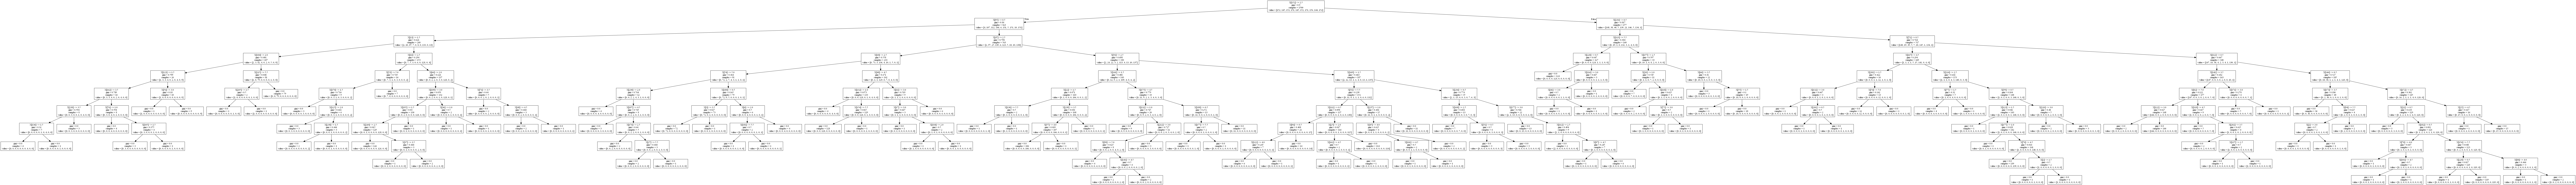

In [433]:
#visualize the DT
dot_data = export_graphviz(DT, out_file = None)
graph = pydotplus.graph_from_dot_data(dot_data)   
Image(graph.create_png())

# DT ver 2 - entropy, best splitter 

In [434]:
# Create Decision Tree classifer object, this time entropy instead of Gini
DT2 = DecisionTreeClassifier(criterion = "entropy")
# Train Decision Tree Classifer
DT2 = DT2.fit(X_train,y_train)

y_pred2 = DT2.predict(X_test)
metrics.accuracy_score(y_test, y_pred2)

0.894

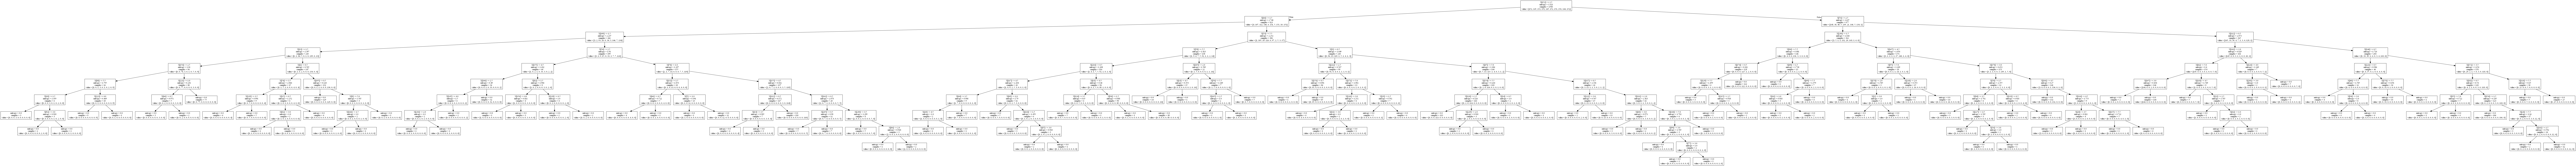

In [435]:
#visualize the DT
dot_data2 = export_graphviz(DT2, out_file = None)
graph2 = pydotplus.graph_from_dot_data(dot_data2)   
Image(graph2.create_png())

# DT ver 3 - Gini, random splitter 

In [436]:
# Create Decision Tree classifer object
DT3 = DecisionTreeClassifier(splitter = "random")
# Train Decision Tree Classifer
DT3 = DT3.fit(X_train,y_train)
#Predict the response for test dataset
y_pred3 = DT3.predict(X_test)

In [437]:
metrics.accuracy_score(y_test, y_pred3)

0.848

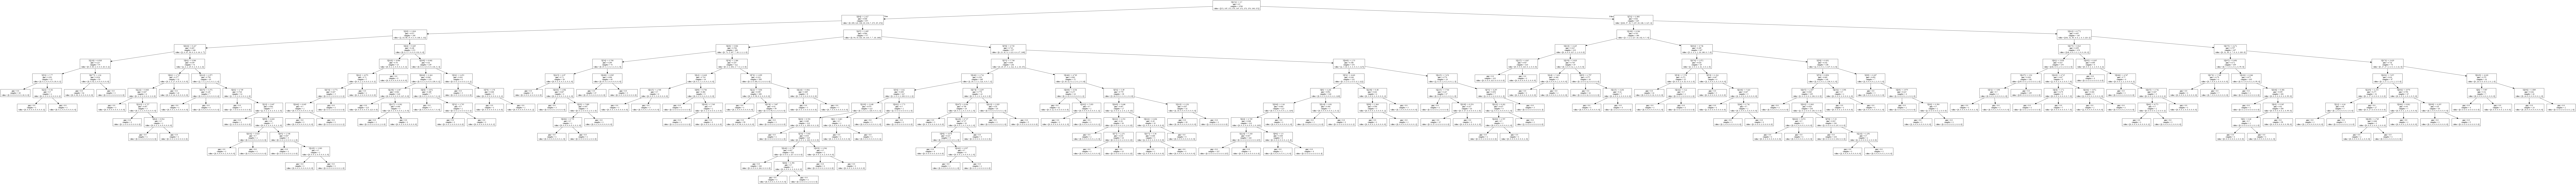

In [438]:
#visualize the DT
dot_data3 = export_graphviz(DT3, out_file = None)
graph3 = pydotplus.graph_from_dot_data(dot_data3)   
Image(graph3.create_png())

# DT ver 4 - entropy, random splitter 

In [439]:
# Create Decision Tree classifer object
DT4 = DecisionTreeClassifier(criterion = "entropy", splitter = "random")
# Train Decision Tree Classifer
DT4 = DT4.fit(X_train,y_train)
#Predict the response for test dataset
y_pred4 = DT4.predict(X_test)
metrics.accuracy_score(y_test, y_pred4)

0.868

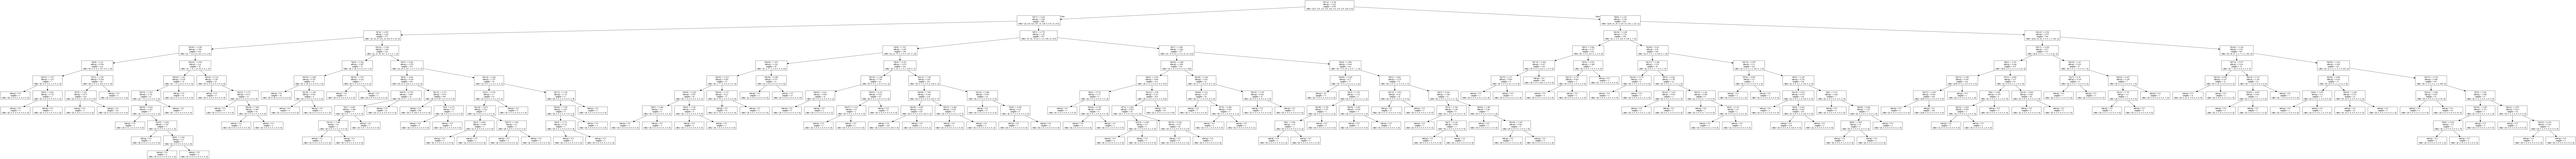

In [440]:
#visualize the DT
dot_data4 = export_graphviz(DT4, out_file = None)
graph4 = pydotplus.graph_from_dot_data(dot_data4)   
Image(graph4.create_png())

# PCA

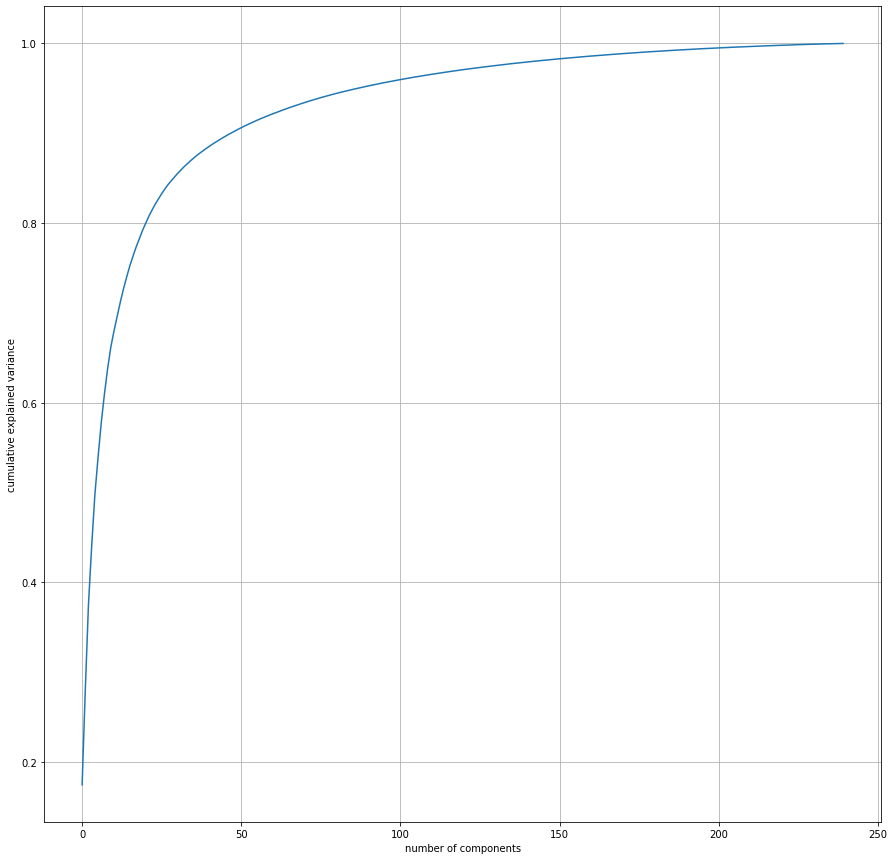

In [441]:
pca = PCA(random_state=0)
pca.fit(digitPics[features])
fig, ax = plt.subplots(figsize=(15, 15))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid(b=True, which='both', axis='both')
plt.show()

In [628]:
#extract top 150 components (approx. 90% variance)
topFeatures = pca.transform(digitPics[features])[:, :230]

In [629]:
#create features' names
PCANumbers = np.arange(1, 231)
PCAFeatures = list(str(' ') * 230)

for i in range (len(PCANumbers)):
    PCAFeatures[i] = "pc" + str(PCANumbers[i])
    
postPCAPics = pd.DataFrame(topFeatures, columns = PCAFeatures)
postPCAPics['label'] = digitLabels

In [630]:
#split the data into train and test
X2 = postPCAPics[PCAFeatures] # Features
y2 = postPCAPics.label # Target variable

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.25, random_state=1)

# DT ver 5 - PCA, Gini, best

In [446]:
# Create Decision Tree classifer object
DT5 = DecisionTreeClassifier()
# Train Decision Tree Classifer
DT5 = DT5.fit(X_train2,y_train2)
#Predict the response for test dataset
y_pred5 = DT5.predict(X_test2)
#check accuracy
metrics.accuracy_score(y_test2, y_pred5)

0.816

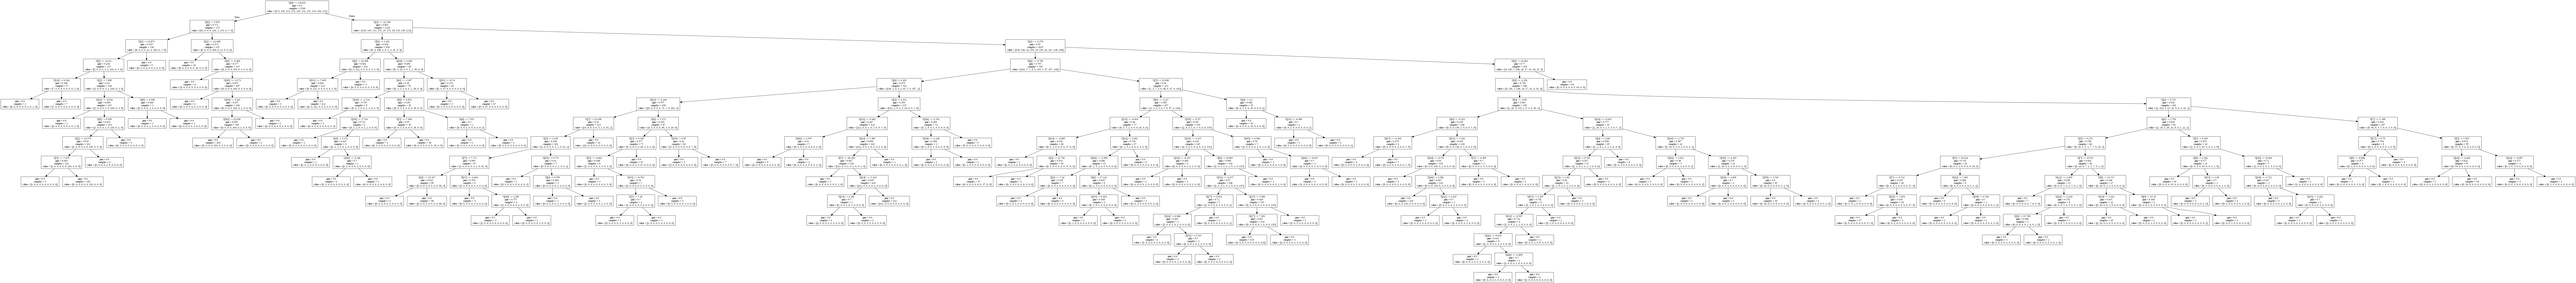

In [447]:
#visualize the DT
dot_data5 = export_graphviz(DT5, out_file = None)
graph5 = pydotplus.graph_from_dot_data(dot_data5)   
Image(graph5.create_png())

# Deskewing - the dataset doesn't need it 

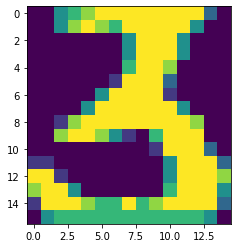

In [551]:
plt.imshow(np.asarray(X_train.iloc[0]).reshape(16,15)) # This is what the image looks like

# Random forest

In [644]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [645]:
metrics.accuracy_score(y_test, y_pred)

0.968

In [646]:
feature_imp = pd.Series(clf.feature_importances_,index=features).sort_values(ascending=False)

No handles with labels found to put in legend.


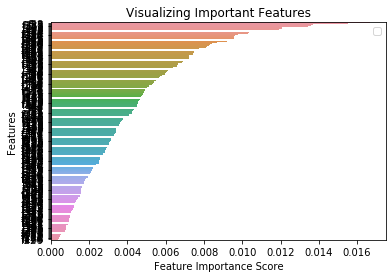

In [647]:
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()
